In [1]:
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
DATA_PATH = Path('../data/bn-mouse-kasthuri_graph_v4.edges')
print(f"Using dataset from {DATA_PATH.absolute()}")
G = nx.read_edgelist(path=DATA_PATH, create_using=nx.Graph(), nodetype=int)
print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))
graph_is_connected = nx.is_connected(G)

Using dataset from c:\Users\szink\Desktop\programming\NetworkAnalysis\assigment1\src\..\data\bn-mouse-kasthuri_graph_v4.edges
#nodes: 1029 and #edges: 1559


### Visualize the graph of the problem

In [3]:
layout = nx.fruchterman_reingold_layout(G)
# plt.figure(figsize=(50,50), dpi=400)
# plt.axis("off")
# nx.draw_networkx(G, layout, with_labels=False, node_size=35, node_color="blue", edge_color="gray", alpha=0.5)

### Export to Gephi

In [4]:
out_path:Path = DATA_PATH.parent.parent.joinpath("out")
nx.write_gexf(G, out_path.joinpath("gephi_graph.gexf"))
nx.write_graphml(G, out_path.joinpath("graphia_graph.graphml"))

### Degree Distribution

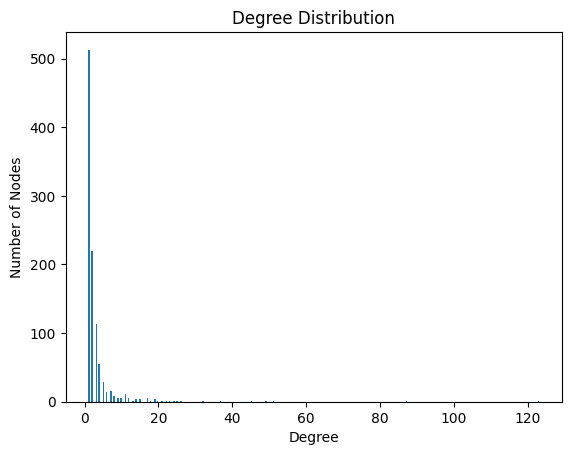

In [35]:
degrees = [degree for node, degree in G.degree()]
plt.hist(degrees, bins='auto')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

### Betweenness Centrality

In [6]:
# Calculate betweeness centrality and sort from the highest value
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(6, 0.3046974535472064),
 (83, 0.1942646504778429),
 (92, 0.10778128627907003),
 (0, 0.0930662752322449),
 (35, 0.0738254230136326),
 (218, 0.06249438279834473),
 (14, 0.04906181353821221),
 (37, 0.03815055957434244),
 (402, 0.03768180358917816),
 (111, 0.03629008523275903)]

### Centrality Measures

In [37]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
eigen = nx.eigenvector_centrality(G)

# Identifying the node with the highest degree centrality
max_degree_centrality_node = max(degree_centrality, key=degree_centrality.get)
all_degree_centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)
print(f"Node with highest degree centrality: {max_degree_centrality_node}")
print(f"Top 10 nodes with highest degree centrality: {all_degree_centrality[0:10]}")

# Identifying the node with the highest betweenness centrality
max_betweenness_centrality_node = max(betweenness_centrality, key=betweenness_centrality.get)
all_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print(f"Node with highest betweenness centrality: {max_betweenness_centrality_node}")
print(f"Top 10 nodes with highest betweenness centrality: {all_betweenness_centrality[0:10]}")

# Identifying the node with the highest closeness centrality
max_closeness_centrality_node = max(closeness_centrality, key=closeness_centrality.get)
all_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
print(f"Node with highest closeness centrality: {max_closeness_centrality_node}")
print(f"Top 10 nodes with highest closeness centrality: {all_closeness_centrality[0:10]}")

max_eigen = max(eigen, key=eigen.get)
all_eigen = sorted(eigen.items(), key=lambda x:x[1], reverse=True)
print(f"Node with highest eigenvector centrality: {max_eigen}")
print(f"Top 10 nodes with highest eigenvector centrality: {all_eigen[0:10]}")

Node with highest degree centrality: 6
Top 10 nodes with highest degree centrality: [(6, 0.11964980544747082), (83, 0.08463035019455253), (92, 0.049610894941634245), (0, 0.047665369649805445), (35, 0.04377431906614786), (218, 0.03599221789883268), (14, 0.0311284046692607), (66, 0.02529182879377432), (37, 0.024319066147859923), (718, 0.023346303501945526)]
Node with highest betweenness centrality: 6
Top 10 nodes with highest betweenness centrality: [(6, 0.3046974535472064), (83, 0.1942646504778429), (92, 0.10778128627907003), (0, 0.0930662752322449), (35, 0.0738254230136326), (218, 0.06249438279834473), (14, 0.04906181353821221), (37, 0.03815055957434244), (402, 0.03768180358917816), (111, 0.03629008523275903)]
Node with highest closeness centrality: 6
Top 10 nodes with highest closeness centrality: [(6, 0.31263337299417954), (83, 0.2963697754018781), (92, 0.2774174107677891), (0, 0.2766060114967514), (147, 0.27364466241533364), (561, 0.27128971695564913), (210, 0.2697421429855656), (11

### Eigenvector Centrality

In [9]:
eigen = nx.eigenvector_centrality(G)
print(f"Node with highest eigenvector centrality: {max(eigen, key=eigen.get)}")
all_eigen = sorted(eigen.items(), key=lambda x:x[1], reverse=True)
print(f"Top 10 nodes with highest eigenvector centrality: {all_eigen[0:10]}")

Node with highest eigenvector centrality: 6
Top 10 nodes with highest eigenvector centrality: [(6, 0.6212054855818037), (83, 0.20514153946452704), (92, 0.14722683811131124), (0, 0.11235963176024505), (210, 0.09060990012397524), (147, 0.08844256191174682), (561, 0.08662364577477094), (496, 0.08209463011722705), (112, 0.07881293739059789), (378, 0.07768149589907879)]


### Average Path Length (for connected components)

In [10]:
if graph_is_connected:
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average path length: {avg_path_length}")
else:
    print("Graph is not fully connected. Consider calculating average path length for largest connected component.")


Graph is not fully connected. Consider calculating average path length for largest connected component.


### Network Density

In [11]:
if graph_is_connected:
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
else:
    print("Graph is not fully connected. Consider calculating diameter for largest connected component.")

Graph is not fully connected. Consider calculating diameter for largest connected component.


### Average Shortest Path Lenght and Network Diameter

In [43]:
if graph_is_connected:
    avg_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    print("Average path length:", avg_path_length)
    print("Diameter:", diameter)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    diameter = nx.diameter(subgraph)
    print("Average path length (largest connected component):", avg_path_length)
    print("Diameter (largest connected component):", diameter)


Average path length (largest connected component): 4.913580399144251
Diameter (largest connected component): 12


### Assortativity

In [14]:
assortativity = nx.degree_pearson_correlation_coefficient(G)
print(f"Assortativity: {assortativity}")

Assortativity: -0.2362722444161856


### Community detection

#### Greedy modulatiry optimization

Number of communities: 41


C:\Users\szink\AppData\Local\Temp\ipykernel_20668\1282689717.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', amount_of_communities)


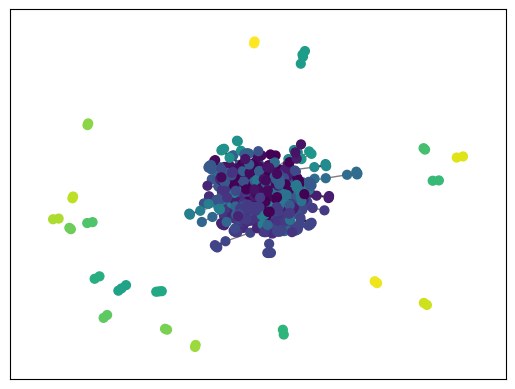

In [40]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
amount_of_communities = len(communities)

print(f"Number of communities: {amount_of_communities}")

# Create a dictionary that maps each node to its community
community_map = {node: i for i, community in enumerate(communities) for node in community}

pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('viridis', amount_of_communities)

# Draw nodes with colors assigned based on their community
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, 
                       node_color=[community_map[node] for node in G.nodes()])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

#### Louvain method

Number of communities: 39


C:\Users\szink\AppData\Local\Temp\ipykernel_20668\3782576591.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', amount_of_communities)


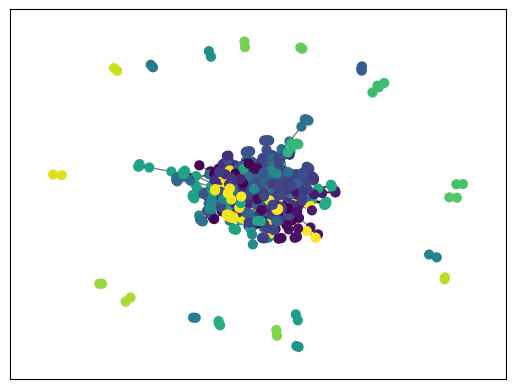

In [41]:
communities = nx.algorithms.community.louvain_communities(G)
amount_of_communities = len(communities)

print(f"Number of communities: {amount_of_communities}")

# Create a dictionary that maps each node to its community
community_map = {node: i for i, community in enumerate(communities) for node in community}

pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('viridis', amount_of_communities)

# Draw nodes with colors assigned based on their community
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, 
                       node_color=[community_map[node] for node in G.nodes()])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [16]:
connected_components_count = len(list(nx.connected_components(G)))
print(f"Number of connected components: {connected_components_count}")

Number of connected components: 20


### Clustering Coefficient

#### Biological Network

In [31]:
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")

Average Clustering Coefficient: 0.0


 In some types of networks, such as certain technological or biological networks, a low clustering coefficient might be expected due to the network's inherent structure or formation processes.

#### Random network comparison

In [50]:
random_graph = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
print("Average clustering coefficient of the original network:", nx.average_clustering(G))
print("Average clustering coefficient of a comparable random network:", nx.average_clustering(random_graph))


Average clustering coefficient of the original network: 0.0
Average clustering coefficient of a comparable random network: 0.0018788467768059607


### Connectivity of the graph

#### Connected components

In [34]:
# For undirected graphs
connected_components = nx.number_connected_components(G)
print(f"Number of Connected Components: {connected_components}")

Number of Connected Components: 20


#### Largest Connected Component

In [54]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
print(f"Average clustering coefficient of the LCC: {nx.average_clustering(subgraph)}")



Average clustering coefficient of the LCC: 0.0
